In [44]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
import os

In [42]:
#importing libraries for  CNN model
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

In [43]:
# Loading and preprocessing the data (we have a dataset in separate train and test folders)
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        'Training',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'Testing',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


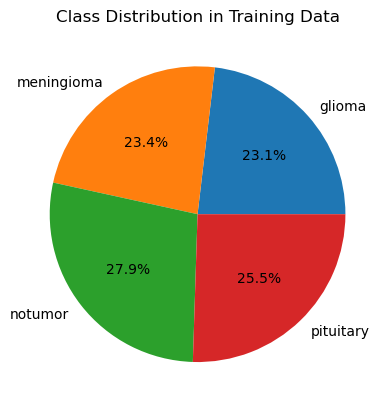

In [45]:
#checking the distribution of training data
train_dir = 'Training'

# Getting the class names
class_names = os.listdir(train_dir)

# Count the number of images in each class
class_counts = []
for class_name in class_names:
    class_dir = os.path.join(train_dir, class_name)
    class_count = len(os.listdir(class_dir))
    class_counts.append(class_count)

# Plot the class distribution as a pie chart
fig, ax = plt.subplots()
ax.pie(class_counts, labels=class_names, autopct='%1.1f%%')
ax.set_title('Class Distribution in Training Data')
plt.show()

In [48]:
# Defining the model architecture we have 4 classes
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(4, activation='softmax')
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

In [50]:
# Compiling the model with appropriate optimizer, loss function and metrics
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model on the training data and validating against test_generator
history=model.fit(
        train_generator,
        epochs=10,
        validation_data=test_generator)

Epoch 1/10
179/179 [==============================] - 54s 292ms/step - loss: 0.6599 - accuracy: 0.7355 - val_loss: 0.6535 - val_accuracy: 0.7635
Epoch 2/10
179/179 [==============================] - 51s 286ms/step - loss: 0.3574 - accuracy: 0.8696 - val_loss: 0.4360 - val_accuracy: 0.8230
Epoch 3/10
179/179 [==============================] - 51s 284ms/step - loss: 0.2507 - accuracy: 0.9093 - val_loss: 0.3299 - val_accuracy: 0.8596
Epoch 4/10
179/179 [==============================] - 50s 280ms/step - loss: 0.1721 - accuracy: 0.9357 - val_loss: 0.2658 - val_accuracy: 0.9054
Epoch 5/10
179/179 [==============================] - 49s 275ms/step - loss: 0.1055 - accuracy: 0.9627 - val_loss: 0.2697 - val_accuracy: 0.9138
Epoch 6/10
179/179 [==============================] - 51s 283ms/step - loss: 0.0733 - accuracy: 0.9743 - val_loss: 0.1416 - val_accuracy: 0.9535
Epoch 7/10
179/179 [==============================] - 49s 276ms/step - loss: 0.0419 - accuracy: 0.9855 - val_loss: 0.1476 - val_ac

In [51]:
y_true = test_generator.classes
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)


41/41 [==============================] - 6s 135ms/step


In [52]:
# Evaluation of the model on the test data
score = model.evaluate_generator(test_generator)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


C:\Users\prana\AppData\Local\Temp\ipykernel_16104\549983306.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = model.evaluate_generator(test_generator)


Test loss: 0.1873701810836792
Test accuracy: 0.9595728516578674


In [32]:
# Initialize an empty list to store the test data
X_test = []
y_test = []
# Loop over all batches of test data
for i in range(test_generator.n // test_generator.batch_size):
    # Retrieve the next batch of test data
    X_batch, y_batch = next(test_generator)
    # Append the input data to the list
    X_test.append(X_batch)
    y_test.append(y_batch)
# Concatenate all batches of test data into a single Numpy array
X_test = np.concatenate(X_test, axis=0)
y_test = np.concatenate(y_test, axis=0)
# Print the shape of the input data array
print('X_test shape:', X_test.shape)
# Print the shape of the output data array
print('y_test shape:', y_test.shape)

X_test shape: (1279, 128, 128, 3)
y_test shape: (1279, 4)


40/40 [==============================] - 2s 61ms/step


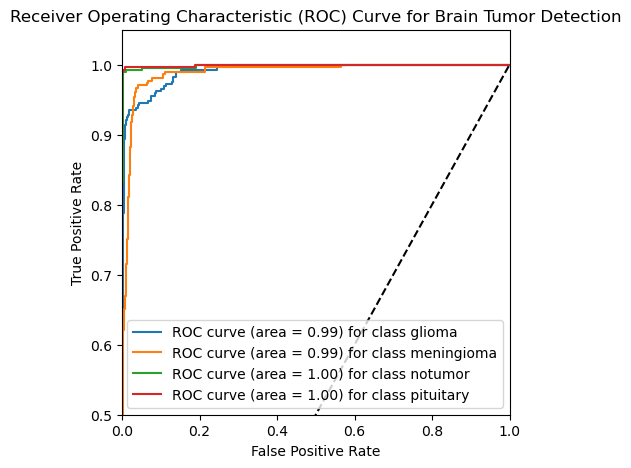

In [57]:
# plotting ROC curves
y_pred = model.predict(X_test)
y_pred_proba = np.exp(y_pred) / np.sum(np.exp(y_pred), axis=-1, keepdims=True)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting ROC curves
plt.figure(figsize=(5,5))
for i in range(4):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc[i], ['glioma', 'meningioma', 'notumor', 'pituitary'][i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.5, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Brain Tumor Detection')
plt.legend(loc="lower right")
plt.show()

40/40 [==============================] - 2s 61ms/step


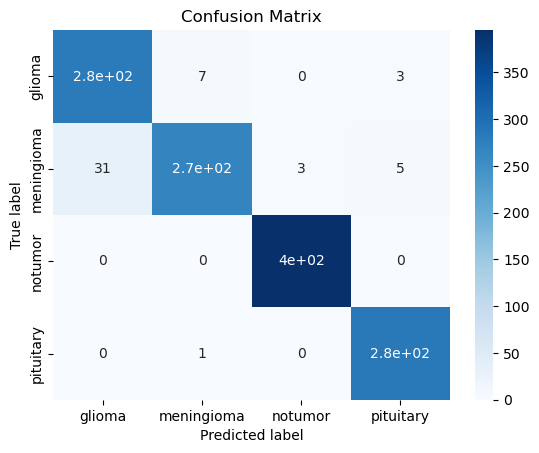

In [40]:
# Making predictions on the test data
y_pred = model.predict(X_test)

y_test_indices = np.argmax(y_test, axis=1)


# Converting predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Computing the confusion matrix
cm = confusion_matrix(y_test_indices, y_pred_labels)

#class names
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']

# Plotting the confusion matrix as a heatmap
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=classes, yticklabels=classes, ax=ax)

# Add axis labels and title
ax.set_xlabel('Predicted label')
ax.set_ylabel('True label')
ax.set_title('Confusion Matrix')
plt.show()

#### As we can observe that there is almost no connection between two diseases and its highly unlikely for the one person to have more than one type of brain tumour

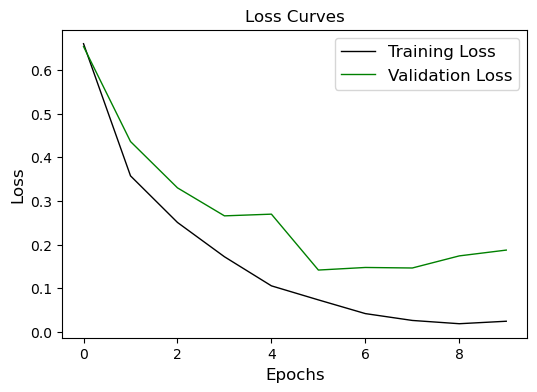

In [55]:
# plotting loss
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=1.0)
plt.plot(history.history['val_loss'], 'green', linewidth=1.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Loss Curves', fontsize=12)
plt.show()



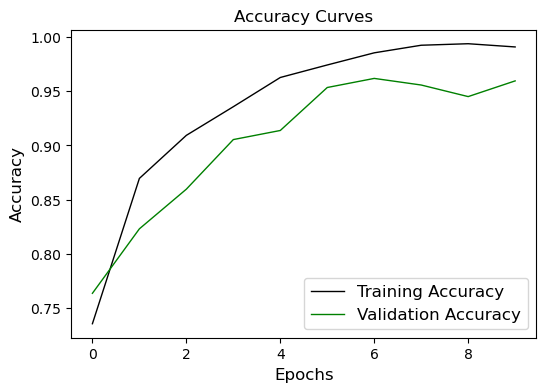

In [56]:
# plotting accuracy
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=1.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=12)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Curves', fontsize=12)
plt.show()